# Assignment 2-1. Topic: Neural Network by implementing it yourself: 4 points

In this assignment, create your **own neural network** using only the Core Python 3.x and *NumPy* library.

Coordinate pairs have been defined in the assignment, and they are used to draw points of two colors (red and blue).
The ultimate goal is to create a neural network that knows how to place a point in the red or blue areas of the coordinate system.

When a new point is drawn on the graph and the coordinates of the point are fed to the neural network,
the neural network predicts the color of the point and the probability that it is that color.

The meaning of the assignment: to better understand the functioning of the neural network algorithm.

The steps of the assignment are:

1. Create training data with coordinate points with colors.
2. Create a neural network class with the structure:
* Input layer with two neurons (x, y) i.e., the coordinate pairs for the (x, y) point.
* One hidden layer with six (6) neurons and sigmoid as activation function.
* Output layer with one neuron and sigmoid as activation function.
* The result of the output layer is therefore a float between [0, 1].
3. Create functions to calculate the neural network's prediction for the input data (*forwardpropagation*) and
   update the connection weight values with the error (*backpropagation*).
4. Feed the training data 1000 times through the neural network.
* In each epoch round, feed the training data row by row through the neural network and update the weight values.
* During the round, save the errors for each input, and add the average of the round's loss to the list. Draw a graph of how the loss changes during training epochs.
5. Predict with a neural network (float value) what color the point will be: `[0.5, 8.7]`. How accurate do you think this prediction is?
6. Predict with a neural network (float value) what color the point is: `[15, -15]`. How accurate do you think this prediction is?
7. Find out how the change in the `learning_rate` argument of the `backpropagation()` method affects the (try values from `0.01` to `0.001`) result?
8. Find out how changing the `n_samples` property of `make_blobs()` affects the result?
9. Find out how changing the `cluster_std` property of `make_blobs()` affects the result?

Tips:
* Draw the structure of this neural network with a drawing program or on paper, where you can see the number of connections in each layer.
* Use the existing solution, and add to it only the necessary calculations for each layer of neural network.

Once the error (loss) function is defined, the _gradient descent_ method is used to minimize it.
In it, the gradient of the error function is calculated in relation to the weighting coefficients, and
it moves step by step to the opposite direction with respect to the gradient until an optimum is found.

### What do you need to implement in this assignment?

* `class NeuralNetwork` - ready-to-use class, i.e., no changes needed
* `train_neural_network()` - ready to use, trains the neural network and saves the loss after each round
* `create_dots_and_labels()` - requires also own implementation
 * plot the losses of the neural network
*  calculate the neural network prediction for the input `[x, y]` in the given variable.

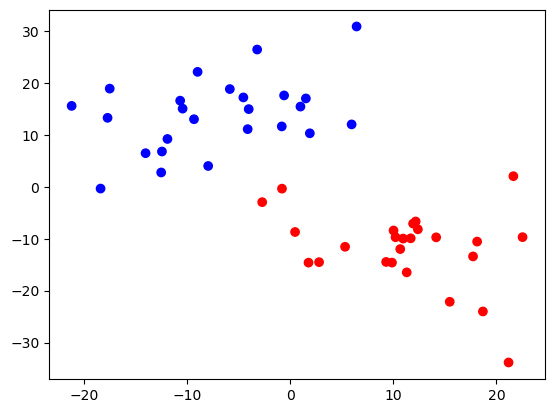

In [16]:
# This assignment uses the make_blobs() function, which can be used to draw the test dataset

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

dots, labels = make_blobs(n_samples=50, centers=2, cluster_std=8, center_box=(-20, 20), random_state=151)
colors = ['red' if label == 0 else 'blue' for label in labels]
plt.scatter(dots[:, 0], dots[:, 1], color=colors)

In [17]:
# `NeuralNetwork` is a ready-to-use class as is.
import numpy as np
class NeuralNetwork:
    def __init__(self):
        self.weights1 = np.random.rand(2, 6)
        self.weights2 = np.random.rand(6, 1)

    def __init__(self, input_neurons, hidden_neurons):
        self.weights1 = np.random.rand(input_neurons, hidden_neurons)
        self.weights2 = np.random.rand(hidden_neurons, 1)

    # Loss function
    def loss_function(self, true, prediction):
        return 0.5 * (true - prediction) ** 2

    # Derivative of the loss function
    def loss_function_derivative(self, true, prediction):
        return true - prediction

    # Sigmoid function
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # Derivative of the sigmoid
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    # Traversal of the neural network
    def forwardpropagation(self, X, y):
        self.X = X
        self.y = y
        self.layer1 = self.sigmoid(np.dot(self.X, self.weights1))
        self.output = self.sigmoid(np.dot(self.layer1, self.weights2))

        # the loss is calculated, i.e., the distance of the neural network's predictions from the correct values
        self.loss = self.loss_function(self.y, self.output)

    # Update weight values using the backpropagation method
    def backpropagation(self, learning_rate):
        output_error = self.loss_function_derivative(self.y, self.output)
        output_delta = output_error * self.sigmoid_derivative(self.output)
        weights2_adjustment = np.dot(self.layer1.T, output_delta)

        layer1_error = np.dot(output_delta, self.weights2.T)
        layer1_delta = layer1_error * self.sigmoid_derivative(self.layer1)
        weights1_adjustment = np.dot(self.X.T, layer1_delta)

        self.weights1 += learning_rate * weights1_adjustment
        self.weights2 += learning_rate * weights2_adjustment


Implement function `create_dots_and_labels()`, that creates the dots and labels and set the RGB color for the dot based on the labels.

You must do the following:
* Create a color table where the color is `[label: 0: "red" or 1: "blue"]`
* Find out how `make_blobs()` works.

`train_neural_network()`: Trains the neural network and saves the loss after each epoch round

see **TODO** items that require you to write your own code.

In [18]:
# TODO: create_dots_and_labels() function should return list with `[dots, labels, colors]`
def create_dots_and_labels():
    # TODO: Find out how increasing the cluster_std property of make_blobs() affects the result?
    dots, labels = make_blobs(n_samples=50, centers=2, cluster_std=8, center_box=(-20, 20), random_state=151)
     
    # TODO: Create a color table where the color is ["red" or "blue"]
    # TODO: Create the colors list based on the values of the labels list
    colors = ['red' if label == 0 else 'blue' for label in labels]
    return [dots, labels, colors]


# Train the neural network and save the loss after each epoch round (this has been already implemented)
def train_neural_network(ntwrk, train_X, train_y):
    losses_arr = []  # save round errors
    epochs = 1000
    for learning_rate in [0.01, 0.005, 0.001]:  # Vary learning rates
        epoch_losses = []  # Save losses for each learning rate
        for epoch in range(epochs):
            batch_losses = []
            # Let's go through each pair of coordinates in loop
            for X, y in zip(train_X, train_y):
                ntwrk.forwardpropagation(np.array([X]), np.array([y]))
                ntwrk.backpropagation(learning_rate=learning_rate)
                batch_losses.append(ntwrk.loss[0])
            epoch_losses.append(np.average(batch_losses))  # average the error values of one round
        losses_arr.append(epoch_losses)
    return losses_arr

* Defining the training data and creating the neural network
* create_dots_and_labels
* Plot the points with *scatter plot*
* You should train the neural network and save the loss of the neural network after each round

In [19]:
# TODO: Create and train a neural network
# ... NeuralNetwork(input_layer_neurons, hidden_layer_neurons)
# ... train_neural_network(...)

# TODO: Create and train the neural network and save the loss of the neural network after each round
class NeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons):
        self.weights1 = np.random.rand(input_neurons, hidden_neurons)
        self.weights2 = np.random.rand(hidden_neurons, 1)

    def loss_function(self, true, prediction):
        return 0.5 * (true - prediction) ** 2

    def loss_function_derivative(self, true, prediction):
        return true - prediction

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forwardpropagation(self, X, y):
        self.X = X
        self.y = y
        self.layer1 = self.sigmoid(np.dot(self.X, self.weights1))
        self.output = self.sigmoid(np.dot(self.layer1, self.weights2))
        self.loss = self.loss_function(self.y, self.output)

    def backpropagation(self, learning_rate):
        output_error = self.loss_function_derivative(self.y, self.output)
        output_delta = output_error * self.sigmoid_derivative(self.output)
        weights2_adjustment = np.dot(self.layer1.T, output_delta)

        layer1_error = np.dot(output_delta, self.weights2.T)
        layer1_delta = layer1_error * self.sigmoid_derivative(self.layer1)
        weights1_adjustment = np.dot(self.X.T, layer1_delta)

        self.weights1 += learning_rate * weights1_adjustment
        self.weights2 += learning_rate * weights2_adjustment

def create_dots_and_labels(n_samples=100, centers=2, cluster_std=1.5, center_box=(-20, 20), random_state=42):
    dots, labels = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, center_box=center_box, random_state=random_state)
    colors = ['red' if label == 0 else 'blue' for label in labels]
    return dots, labels, colors

def train_neural_network(ntwrk, train_X, train_y):
    losses_arr = []
    epochs = 1000
    for learning_rate in [0.01, 0.005, 0.001]:
        epoch_losses = []
        for epoch in range(epochs):
            batch_losses = []
            for X, y in zip(train_X, train_y):
                ntwrk.forwardpropagation(np.array([X]), np.array([y]))
                ntwrk.backpropagation(learning_rate=learning_rate)
                batch_losses.append(ntwrk.loss[0])
            epoch_losses.append(np.average(batch_losses))
        losses_arr.append(epoch_losses)
    return losses_arr

def create_and_train_neural_network(n_samples=100, centers=2, cluster_std=1.5, center_box=(-20, 20), random_state=42):
    input_layer_neurons = 2
    hidden_layer_neurons = 6
    neural_network = NeuralNetwork(input_layer_neurons, hidden_layer_neurons)

    dots, labels, colors = create_dots_and_labels(n_samples=n_samples, cluster_std=cluster_std, center_box=center_box, random_state=random_state)

    losses = train_neural_network(neural_network, dots, labels)

    return neural_network, losses

# Generate data
n_samples = 100
dots, labels, colors = create_dots_and_labels(n_samples=n_samples, cluster_std=1.5)



Let's plot the losses of the neural network

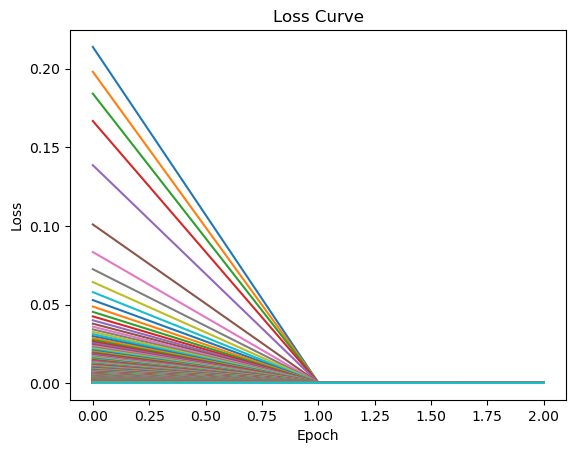

In [20]:
# TODO: Plot the losses of the neural network
import matplotlib.pyplot as plt
neural_network, losses = create_and_train_neural_network(n_samples=n_samples, cluster_std=1.5)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

### Let's calculate the following predictions
* Calculate the neural network prediction for the input `[0.5, 8.7]` in the `output1` variable.
* Calculate the neural network prediction for the input `[15, -15]` in the `output2` variable.


In [21]:
# TODO: Calculate two predictions for given (x,y) points

# TODO: Calculate the prediction for the first input
test_X_nn = np.array([0.5, 8.7])
# layer1_output = neural_network.sigmoid(np.dot(numpy_array, weight_values))
neural_network.forwardpropagation(test_X_nn, 0)  # The second argument (0) doesn't affect the forward propagation

output1 = neural_network.output # TODO: This value must be calculated.

# TODO: Calculate the prediction for the second input
test_X_nn2 = np.array([15, -15])
neural_network.forwardpropagation(test_X_nn2, 0)  # The second argument (0) doesn't affect the forward propagation

output2 = neural_network.output 


In [22]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the task.
print(output1)
print(output2)

[0.14887122]
[0.99797452]


# Assignment 2-2
# Topic: Simple neural network with Keras Sequential API (max. 3 p)

Train a simple neural network with the **Keras** interface using *Titanic dataset*.

You can get the dataset from the URL: `https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta10/titanic.csv`

Steps that must be found in the assignment:
1. Choose only the most important features from the Titanic data
2. Create a neural network (use `tf.keras.Sequential()` method)
3. Define loss function and optimizer (use `model.compile()` method)
4. Train the neural network (use `model.fit()` method)
5. Compare the predictions given by the neural network with the test data (use the `model.evaluate()` method)
6. Print the results of the epochs to the console.
7. Change the structure of the neural network and try to document the neural network with which you got the best results.
* 500 - 1000 learning rounds (epochs) are certainly enough for this neural network.

Example output:
```
23/23 [==============================] - 0s 687us/step - loss: 2.2182 - accuracy: 0.6236
Epoch 2/1000
23/23 [==============================] - 0s 702us/step - loss: 1.4468 - accuracy: 0.6238
```

Note! It's worth trying several neural network structures and comparing the learning results a little.


### Data preprocessing + Keras - Titanic dataset

A version that aims to retrieve the most important features that are most correlated with the `survived` field (class variable).


In [14]:
# TODO: Implementation of the task
# TODO: Implement Data Preprocessing

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta10/titanic.csv')

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


If you get *"SSL certificate expired error"*, the above code will help.

Another alternative is to just copy the CSV file to your own local repository to do the assignment.

In [9]:
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
# df = pd.read_csv(...)

### Splitting the Data
* Extract the class variable from the data.
* Divide the data into training and test data.


In [21]:
# Implementation of the task

# TODO: Extract the class variable from the data

# TODO: Split into training and test data

# Splitting the Data
from sklearn.model_selection import train_test_split

# Extract the class variable 'Survived'
X = df.drop(columns=['Survived'])  # Features
y = df['Survived']  # Class variable

# Divide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Training set shape (X_train):", X_train.shape)
print("Test set shape (X_test):", X_test.shape)
print("Training set shape (y_train):", y_train.shape)
print("Test set shape (y_test):", y_test.shape)


Training set shape (X_train): (712, 11)
Test set shape (X_test): (179, 11)
Training set shape (y_train): (712,)
Test set shape (y_test): (179,)


### Implementation of the task using the Keras library

Create a neural network with `Dense` layers one after the other (`Sequential`). Specify these two parameters at least:
* `units` – dimensionality of the output space.
* `activation` – Activation function to use.

Creating a neural network based on `Sequential` class.

      model = tf.keras.Sequential([
          tf.keras.layers.Dense(neurons, activation='relu'), ...
          # Define Layers in between (one or more hidden layers)
          # In the output layer there is only one neuron (i.e. Survived, the output value is between 0-1)

Note! It is worth trying several neural network structures and comparing the learning results of them.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta10/titanic.csv')

# Selecting the most important features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

# Preprocessing
# Handling missing values, encoding categorical variables
preprocessor = make_column_transformer(
    (SimpleImputer(strategy='mean'), ['Age', 'Fare']),
    (OneHotEncoder(), ['Sex', 'Embarked', 'Pclass']),
    remainder='passthrough'
)

X_processed = preprocessor.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


Next steps in the task are:

* Compile the model (`model.compile()`)
* Train the neural network with *n epoch* rounds (`model.fit()`)
* Compare the obtained learning results with the test data (`model.evaluate()`)
* define loss function: `loss='binary_crossentropy'`

Note! `verbose=1` is a good option in the fit()/evaluate() functions, which allows you to see how the teaching progresses by epoch cycles

In [5]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=500,  # Adjust the number of epochs as needed
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)



Epoch 1/500
23/23 [==============================] - 1s 11ms/step - loss: 0.5886 - accuracy: 0.7163 - val_loss: 0.5061 - val_accuracy: 0.8045
Epoch 2/500
23/23 [==============================] - 0s 4ms/step - loss: 0.4749 - accuracy: 0.7907 - val_loss: 0.4521 - val_accuracy: 0.7989
Epoch 3/500
23/23 [==============================] - 0s 4ms/step - loss: 0.4355 - accuracy: 0.8118 - val_loss: 0.4360 - val_accuracy: 0.7989
Epoch 4/500
23/23 [==============================] - 0s 4ms/step - loss: 0.4230 - accuracy: 0.8146 - val_loss: 0.4333 - val_accuracy: 0.7989
Epoch 5/500
23/23 [==============================] - 0s 4ms/step - loss: 0.4163 - accuracy: 0.8230 - val_loss: 0.4299 - val_accuracy: 0.8045
Epoch 6/500
23/23 [==============================] - 0s 4ms/step - loss: 0.4123 - accuracy: 0.8188 - val_loss: 0.4265 - val_accuracy: 0.7933
Epoch 7/500
23/23 [==============================] - 0s 4ms/step - loss: 0.4067 - accuracy: 0.8258 - val_loss: 0.4276 - val_accuracy: 0.7933
Epoch 8/500


In [6]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the task. Set the result of the model.evaluate() function in the results variable.

# TODO: Be sure to set the model.compile() function to be tracked as metrics=['accuracy'] to define the accuracy of the neural network predictions.

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
results = [test_loss, test_accuracy]
print(f"Test Loss:{results[0]} Test Accuracy:{results[1] * 100}%")

6/6 [==============================] - 0s 3ms/step - loss: 0.7967 - accuracy: 0.8212
Test Loss:0.7966839671134949 Test Accuracy:82.12290406227112%


In [ ]:
#Overall, the model serves as a starting point for binary classification tasks, and there's room for improvement by experimenting with different architectures, hyperparameters, and feature engineering techniques to achieve higher accuracy and better generalization to unseen data.

About the modeling results:
* Test Accuracy: approx. 80% or greater is already pretty good
* You can try to get better results for improving your modeling skills
